# Guided Project: Star Wars Survey

## Table of Contents 
1. [Introduction](#introduction)
2. [Import the dependencies](#import-the-dependencies)
3. [Read data](#read-data)
4. [Cleaning and mapping yes/no columns](#cleaning-and-mapping-yesno-columns)
5. [Cleaning and mapping checkbox columns](#cleaning-and-mapping-checkbox-columns)
6. [Cleaning the ranking columns](#cleaning-the-ranking-columns)
7. [Finding the Highest-Ranked Movie](#finding-the-highest-ranked-movie)
8. [Finding the Most-Viewed Movie](#finding-the-most-viewed-movie)
9. [Exploring the Data by Binary Segment](#exploring-the-data-by-binary-segments)



## Introduction <a name = "introduction"></a>

This is a guided project I completed on the Dataquest learning platform. The focus of this project was to learn new skills related to the data cleansing workflow. The goals are to cleanse and explore the available public data set as well as to answer the question **"does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?"**. The code is written in Python, using pandas, numpy and matplotlib.pyplot libraries, and is shown in Jupyter Notebooks.

To run these notebooks in your own local dev environent:

1. Download the Basics.ipynb file in this repository and place it in  "<your_dev_folder>" folder
2. Download the data set star_wars.csv file in this repository and place it in "<your_dev_folder>/data/star_wars" folder

For the full data set and story behind it, published by [fivethirtyeight](https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/), go to the following source:
- [Star Wars](https://github.com/fivethirtyeight/data/blob/master/star-wars-survey/StarWars.csv) - A survey of Star Wars fans with 835 responses

## Import the dependencies <a name="import-the-dependencies"></a>
We need to use the numpy, pandas and matplotlib libraries within this notebook.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read data <a name = "read-data"></a>
First, read the data from the public dataset into a pandas dataframe. 
In this case, the .csv file is located in the same directory as this notebook.

In [31]:
star_wars = pd.read_csv("data/star_wars/star_wars.csv", encoding="ISO-8859-1")

# check: explore the data and column names
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning and mapping yes/no columns <a name="cleaning-and-mapping-yesno-columns"></a>
There are 2 columns in the data set which represent "Yes/No" responses. To enable easier analysis, convert the values to True or False values. 

In [32]:
# create a dictionary to map and convert yes or no to true or false
yes_no = {
    "Yes": True,
    "No": False
}

star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)

#check: view the results of this transformation on these columns
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning and mapping checkbox columns <a name="cleaning-and-mapping-checkbox-columns"></a>
By exploring the source dataset, one can observe that there are 7 columns which are user's responses to a question about which Star Wars films they've seen. The format is not ideal for analysis for 2 reasons:
1. The "Yes" answers are recorded as the name of the film, and "No" answers or not answered responses are recorded as null values. 
2. Besides the first column, the rest of the columns are "Unnamed". 

In [33]:
star_wars[star_wars.columns[3:9]].head()

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN
3,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
4,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi


The 2 issues can be addressed by 
1. changing the responses to True (Yes) or False (no, NaN) by applying a map for each row value
2. renaming the columns to "seen_1", "seen_2" etc.

In [34]:
# map yes, no or not answered questions
ep_map = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.NaN: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

# apply the map to each of the six questions and change to True or NaN
for c in star_wars.columns[3:9]:
    star_wars[c] = star_wars[c].map(ep_map)
# renaming the columns to "seen_1", "seen_2" etc.   
star_wars = star_wars.rename(columns={"Which of the following Star Wars films have you seen? Please select all that apply." : "seen_1",
                                     "Unnamed: 4": "seen_2",
                                     "Unnamed: 5": "seen_3",
                                     "Unnamed: 6": "seen_4",
                                     "Unnamed: 7": "seen_5",
                                     "Unnamed: 8": "seen_6",
                                     "Unnamed: 9": "seen_7"
                                     })

The column header and values after the previous transformation are looking better now:

In [35]:
# review the column headers and values after the previous transformation
star_wars[star_wars.columns[3:9]].head()

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
0,True,True,True,True,True,True
1,False,False,False,False,False,False
2,True,True,True,False,False,False
3,True,True,True,True,True,True
4,True,True,True,True,True,True


## Cleaning the ranking columns <a name="cleaning-the-ranking-columns"></a>
The next six columns ask the respondent to rank the Star Wars movies in order from least to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN

In [36]:
star_wars[star_wars.columns[3:15]].head()

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0
1,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
2,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0
3,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0
4,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0


- The column "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film" refers to how much the respondent liked Star Wars: Episode I The Phantom Menace"
- "Unnamed: 10" refers to how much the respondent liked Star Wars: Episode II Attack of the Clones
- "Unnamed: 11" refers to how much the respondent liked Star Wars: Episode III Revenge of the Sith
- and so forth until "Unnamed: 14"

Next, convert each column to a numeric type, then rename the columns so that we can tell what they represent more easily.

In [37]:
# convert numerical values to float
#star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars.iloc[2,9:15] = star_wars.iloc[2,9:15].astype(float)

# rename each column to something more descriptive
star_wars = star_wars.rename(columns={"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film." : "ranking_1",
                                     "Unnamed: 10": "ranking_2",
                                     "Unnamed: 11": "ranking_3",
                                     "Unnamed: 12": "ranking_4",
                                     "Unnamed: 13": "ranking_5",
                                     "Unnamed: 14": "ranking_6"
                                     })

The column header and values after the previous transformation are looking better now, but the first data rows still contains the text showing the full episode name:

In [38]:
# review the column headers and values after the previous transformation
star_wars[star_wars.columns[9:15]].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
0,3.0,2.0,1.0,4.0,5.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,4.0,5.0,6.0
3,5.0,6.0,1.0,2.0,4.0,3.0
4,5.0,4.0,6.0,2.0,1.0,3.0


## Finding the Highest-Ranked Movie <a name="finding-the-highest-ranked-movie"></a>
Now that we've cleaned up the ranking columns, we can find the highest-ranked movies.

In [39]:
# create a dataframe with the average per movie
avg_ranking = star_wars[star_wars.columns[9:15]].mean()
print(avg_ranking)

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


Below is a bar chart showing the average ranking per movie.

Text(0, 0.5, 'Average Ranking')

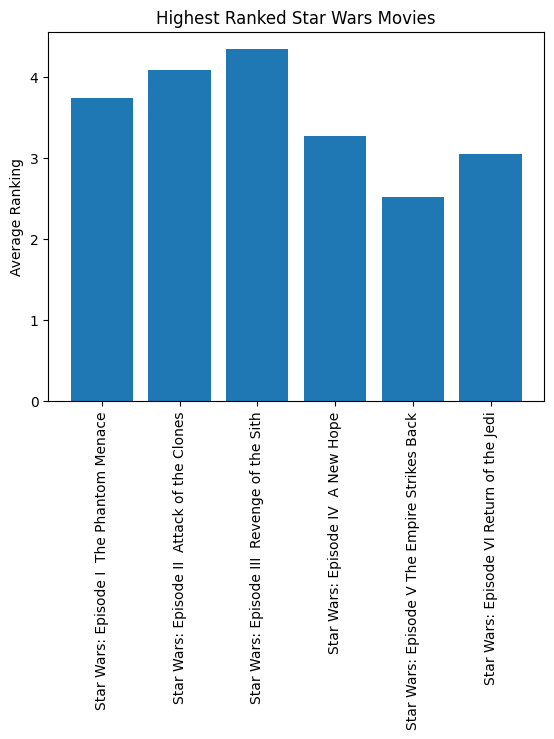

In [40]:
# show a bar chart to compare each movie's average ranking
%matplotlib inline

eps = ep_map.keys()
eps = [item for item in eps if not(pd.isnull(item)) == True]
plt.bar(range(6), avg_ranking)
plt.title('Highest Ranked Star Wars Movies')
plt.xticks([0,1,2,3,4,5],eps)
plt.xticks(rotation=90)
plt.ylabel('Average Ranking')

### Conclusion
From the chart one can see that the lowest (best)-ranked movie was Episode 5. I think that this is due to the fact that when Episode 4 was released, it took awhile for the fan base to grow. Subsequently there was a big expectation and hype before Episode 5 was released, and when it did, apparently the franchise delivered. When  Episode 1 , 2 and 3 (the prequels) were released 20 years later, it appears that it didn't meet expectations, indicated by the rising ranking.

## Finding the Most Viewed Movie <a name="finding-the-most-viewed-movie"></a>
Earlier in this project, we cleaned up the seen columns and converted their values to the Boolean type. We can derive True as 1 and False as 0, thereby allowing us to get a sum of views for each movie. 

In [41]:
# create a dataframe with the total views per movie
most_views = star_wars[star_wars.columns[3:9]].sum()
print(most_views)

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64


Below is a bar chart showing the total views per movie.

Text(0, 0.5, 'Total Views')

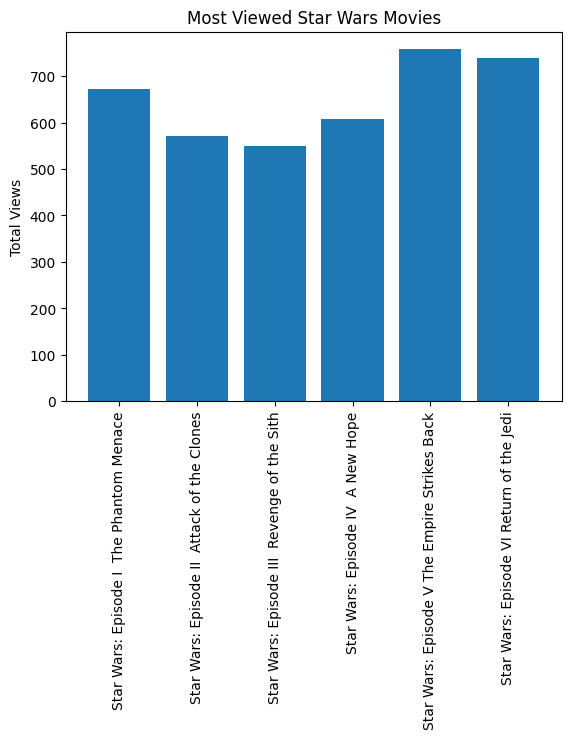

In [42]:
# show a bar chart to compare each movie's total views

plt.bar(range(6), most_views)
plt.title('Most Viewed Star Wars Movies')
plt.xticks([0,1,2,3,4,5],eps)
plt.xticks(rotation=90)
plt.ylabel('Total Views')

### Conclusion
Once again, it appears that Episode 2 was the most viewed in addition to being the best ranked. 
It appears that there is a correlation between the average rating and the sum of views of these movies, that is, the more views there are, the better (lower) the average ranking is.

## Exploring the Data by Binary Segments <a name="exploring-the-data-by-binary-segments"></a>
We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded.
There are several columns that segment our data into two groups. 
- Do you consider yourself to be a fan of the Star Wars film franchise? — True or False
- Do you consider yourself to be a fan of the Star Trek franchise? — Yes or No **--> I chose this segmentation**
- Gender — Male or Female

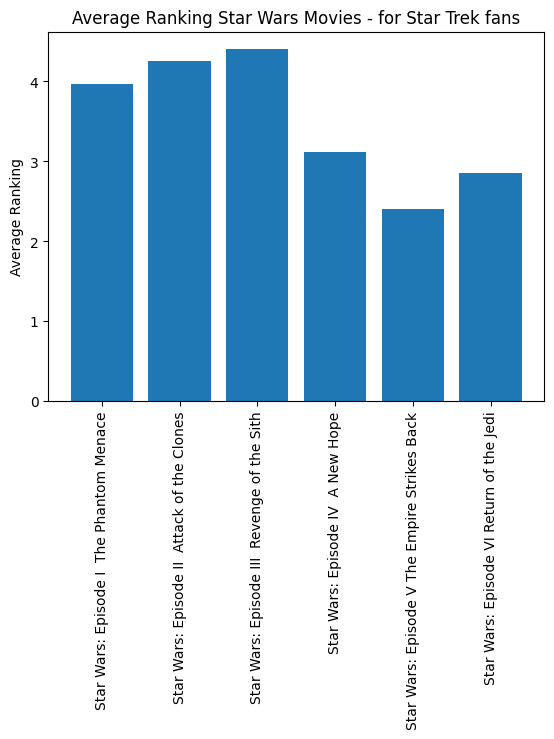

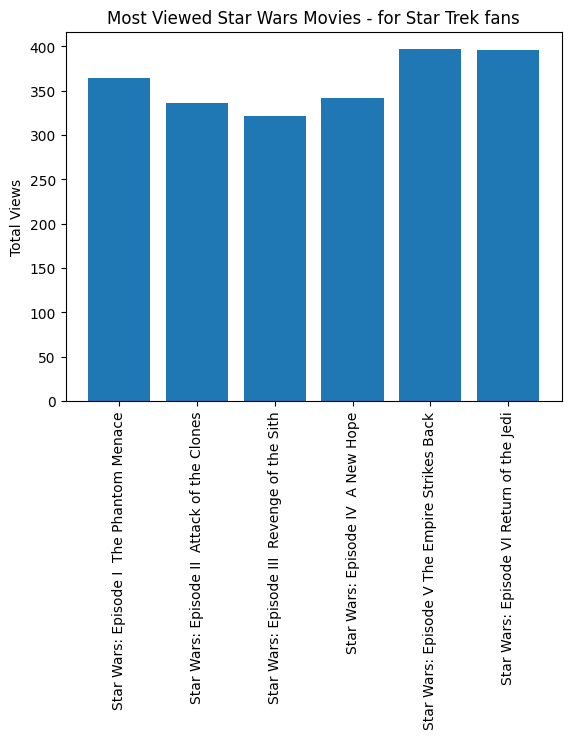

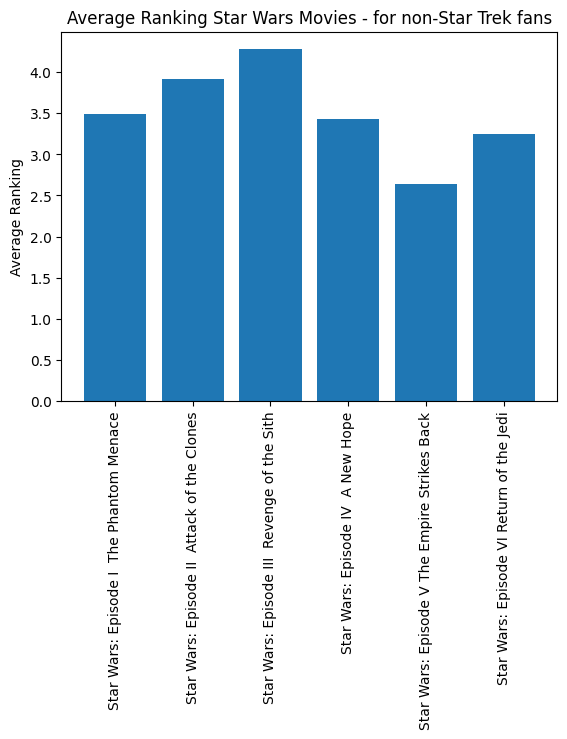

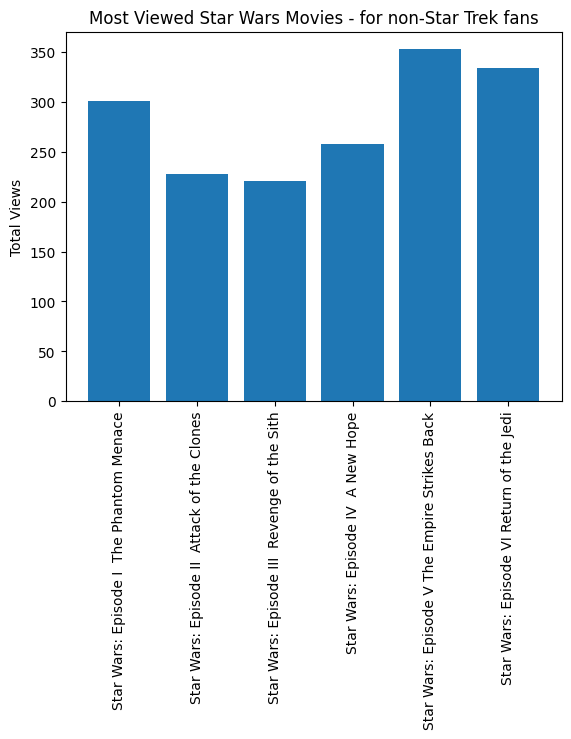

In [43]:
# Split the data into two groups based on "Star Trek fan or not" column
star_trek_q = "Do you consider yourself to be a fan of the Star Trek franchise?"
trekkies = star_wars[star_wars[star_trek_q] == "Yes"]
non_trekkies = star_wars[star_wars[star_trek_q] == "No"]

# Plot the avg. ranking and total views charts - for Star Trek fans
fans_avg_ranking = trekkies[trekkies.columns[9:15]].mean()
fans_most_views = trekkies[trekkies.columns[3:9]].sum()
# uncomment the following 2 lines to confirm the values
#print(star_wars_avg_ranking)
#print(star_wars_most_views)

plt.bar(range(6), fans_avg_ranking)
plt.title('Average Ranking Star Wars Movies - for Star Trek fans')
plt.xticks([0,1,2,3,4,5],eps)
plt.xticks(rotation=90)
plt.ylabel('Average Ranking')
plt.show()

plt.bar(range(6), fans_most_views)
plt.title('Most Viewed Star Wars Movies - for Star Trek fans')
plt.xticks([0,1,2,3,4,5],eps)
plt.xticks(rotation=90)
plt.ylabel('Total Views')
plt.show()

# Do the same for non-Star Trek fans
nfans_avg_ranking = non_trekkies[non_trekkies.columns[9:15]].mean()
nfans_wars_most_views = non_trekkies[non_trekkies.columns[3:9]].sum()
# uncomment the following 2 lines to confirm the values
#print(star_wars_avg_ranking)
#print(star_wars_most_views)

plt.bar(range(6), nfans_avg_ranking)
plt.title('Average Ranking Star Wars Movies - for non-Star Trek fans')
plt.xticks([0,1,2,3,4,5],eps)
plt.xticks(rotation=90)
plt.ylabel('Average Ranking')
plt.show()

plt.bar(range(6), nfans_wars_most_views)
plt.title('Most Viewed Star Wars Movies - for non-Star Trek fans')
plt.xticks([0,1,2,3,4,5],eps)
plt.xticks(rotation=90)
plt.ylabel('Total Views')
plt.show()

### Conclusion
Interestingly, whether a viewer is a Star Trek fan or not, compared to the overall response, there are similar results for the average ranking and the total number of views. See the charts above, which for each group, separately shows the most viewed movie and the highest-ranked movie. 